In [33]:
##!pip install networkx
##!pip install scipy
!pip install matplotlib

     |████████████████████████████████| 7.2 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 362 kB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 1.3 MB/s eta 0:00:01


In [34]:
import tweepy
import webbrowser
import time
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [35]:
consumer_key = "HO24YC3OXsclTklb9q91rPstc"
consumer_secret = "L4AlvJI2ClgptTEdlHNmgYTgqbrbsjECS9tSySRNiVH5aaLTej"
callback_uri = 'oob' 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
redirect_url = auth.get_authorization_url()
webbrowser.open(redirect_url)
user_pin_input = input("What's the pin value? ")
auth.get_access_token(user_pin_input)

What's the pin value? 9441915


('486977981-9vqd1VTICsY4i1HOFC0eBkvU2JUUXuxmjMS6nwwa',
 'MTNvx5Fuula5Bqwo0iEqP0XMXB5nSgWipbTxtuAw4H4e3')

In [36]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [37]:
me = api.get_user(screen_name = 'MrFlantastic')

In [38]:
me.id

486977981

In [39]:
user_list = ["486977981"]
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)

780


In [40]:
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = follower_list[0] #Set the list of followers as the target column
df['source'] = 486977981 #Set my user ID as the source 

In [41]:
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

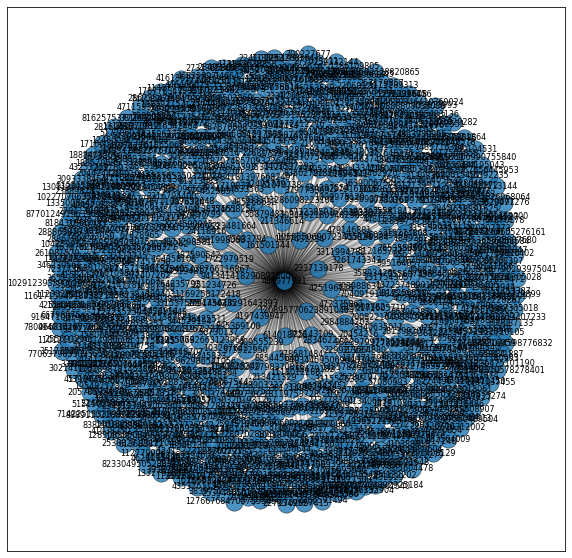

In [42]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

In [ ]:
user_list = list(df['target']) #Use the list of followers we extracted in the code above i.e. my 780 followers
for userID in user_list:
    print(userID)
    followers = []
    follower_list = []

    # fetching the user
    user = api.get_user(userID)

   # fetching the followers_count
    followers_count = user.followers_count

    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=userID).pages():
            followers.extend(page)
            print(len(followers))
            if followers_count >= 5000: #Only take first 5000 followers
                break
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)
    temp = pd.DataFrame(columns=['source', 'target'])
    temp['target'] = follower_list[0]
    temp['source'] = userID
    df = df.append(temp)
    df.to_csv("networkOfFollowers.csv")

1404854886538301443
2
1888408500
739
1022707063565082624
3826
1370755198994513926
155
31285669
791
389887281
5000
4833056519
3817
1262898781453869059
366
1413156511124103169
21
450331119
2591
12480032
5000
138456252
402
251234726
error
27561363


Rate limit reached. Sleeping for: 447


256
2155481869
572
4777653615
21
1011055621
1987
277073411
2702
1059550690723405824
2508
61896141
5000
881574490639015936
711
58975906
5000
985287670745088001
3213
38494397
5000
1232097506990755840
260
1372374890112716803
210
1305597779729952769
27
779497280651071488
5000
599457344


Rate limit reached. Sleeping for: 890


165
1259864324564307975
error
551584450
1895
1283083350349983744
44
1366020399176286211
3
4665383681
1277
6014732
4525
1188483034598776832
958
1241532312376029185
19
1347743262942126080
1
2794734235
error
1314717996234027014
875
51070738
94
870601003
642
21926861
1651
3188903222


Rate limit reached. Sleeping for: 891


In [ ]:
df = pd.read_csv(“networkOfFollowers.csv”) #Read into a df
G = nx.from_pandas_edgelist(df, 'source', 'target')

In [ ]:
G.number_of_nodes() #Find the total number of nodes in this graph

In [ ]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = [‘nconst’,’degree’]
G_sorted.head()

In [ ]:
u = api.get_user(XXXXXX)
u.screen_name

In [ ]:
G_tmp = nx.k_core(G, 10) #Exclude nodes with degree less than 10

In [ ]:
from community import community_louvain
partition = community_louvain.best_partition(G_tmp)
#Turn partition into dataframe
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']

In [ ]:
G_sorted = pd.DataFrame(sorted(G_tmp.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['names','degree']
G_sorted.head()
dc = G_sorted

In [ ]:
combined = pd.merge(dc,partition1, how='left', left_on="names",right_on="names")

In [ ]:
pos = nx.spring_layout(G_tmp)
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
#cc = nx.betweenness_centrality(G2)
nodes = nx.draw_networkx_nodes(G_tmp, pos,
                                cmap=plt.cm.Set1,
                                node_color=combined['group'],
                                alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G_tmp, pos, font_size=8)
nx.draw_networkx_edges(G_tmp, pos, width=1.0, alpha=0.2)
plt.savefig('twitterFollowers.png')

In [ ]:
combined = combined.rename(columns={"names": "Id"}) #Gephi really likes when your node column is called 'Id'
edges = nx.to_pandas_edgelist(G_tmp)
nodes = combined['Id']

edges.to_csv("edges.csv")
combined.to_csv("nodes.csv")